# Корона вирус хугацааны таамаглал дэвшүүлэх нь
2020 оны эхэн үеэс эхэлсэн цар тахалын нас баралтын хэмжээг хугацааны таамаглал дэвшүүлэх даалгавар.
Энэхүү даалгавар нь үндсэн 3 хэсэгтэй бөгөөд үүнд:
1. Өгөгдлийг татах болон боловсруулах
2. Сургалтын загварыг боловсруулах
3. Сургалт болон дүгнэлт

In [ ]:
import requests

# URL of the CSV file
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"

# File name to save the downloaded CSV
output_file = "compact.csv"

try:
    # Send GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check for HTTP errors

    # Write the content to a file
    with open(output_file, "wb") as file:
        file.write(response.content)

    print(f"File downloaded successfully and saved as {output_file}")
except requests.exceptions.RequestException as e:
    print(f"Failed to download the file: {e}")


File downloaded successfully and saved as compact.csv


##  Өгөгдлийг татах болон боловсруулах
https://ourworldindata.org/coronavirus/country/mongolia

In [ ]:
import pandas as pd
import torch
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder

from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

# Load the CSV data from the URL
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
covid = pd.read_csv(url)

# Display the first few rows of the data
print(covid.head())


       country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-01-01          NaN        NaN                 NaN   
1  Afghanistan  2020-01-02          NaN        NaN                 NaN   
2  Afghanistan  2020-01-03          NaN        NaN                 NaN   
3  Afghanistan  2020-01-04          NaN        NaN                 NaN   
4  Afghanistan  2020-01-05          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      NaN                    NaN   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578846.0   
1                             NaN           NaN         NaN  ...  40578846.0

In [ ]:
# covid=pd.read_csv("owid-covid-data.csv")
# covid.head()

In [ ]:
covid_mongolia=covid[covid['country']=="Afghanistan"]

In [ ]:
covid_mongolia.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [ ]:
covid_mongolia["date"]=pd.to_datetime(covid_mongolia["date"])

<ipython-input-15-6e7790037212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mongolia["date"]=pd.to_datetime(covid_mongolia["date"])


In [ ]:
dates = pd.to_datetime(covid_mongolia["date"])

train_data = covid_mongolia[["date","new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]]
# new_people_vaccinated_smoothed, new_cases_smoothed, new_deaths_smoothed
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

<ipython-input-16-afbef6fb43a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Year"] = dates.dt.year
<ipython-input-16-afbef6fb43a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Month"] = dates.dt.month
<ipython-input-16-afbef6fb43a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
0,2020-01-01,NaN,NaN,NaN,2020,1,1
1,2020-01-02,NaN,NaN,NaN,2020,1,2
2,2020-01-03,NaN,NaN,NaN,2020,1,3
3,2020-01-04,NaN,NaN,NaN,2020,1,4
4,2020-01-05,NaN,NaN,NaN,2020,1,5


In [ ]:
train_data = train_data.dropna()
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
419,2021-02-23,1366.6666,16.0,0.714286,2021,2,23
420,2021-02-24,1366.6666,16.0,0.714286,2021,2,24
421,2021-02-25,1366.6666,16.0,0.714286,2021,2,25
422,2021-02-26,1366.6666,16.0,0.714286,2021,2,26
423,2021-02-27,1366.6666,16.0,0.714286,2021,2,27


In [ ]:
print("Number of Confirmed Cases",covid_mongolia["total_cases"].iloc[-1], covid_mongolia["date"].iloc[-1])
print("Number of Recovered Cases",covid_mongolia["total_deaths"].iloc[-1], covid_mongolia["date"].iloc[-1])

Number of Confirmed Cases 235214.0 2024-11-10 00:00:00
Number of Recovered Cases 7998.0 2024-11-10 00:00:00


In [ ]:
fig=px.bar(x=train_data["date"],y=train_data["new_cases_smoothed"])
fig.update_layout(title="Distribution of Number of New Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()



In [ ]:
fig=px.bar(x=covid_mongolia["date"],y=covid_mongolia["new_vaccinations_smoothed"])
fig.update_layout(title="Distribution of Number of Vaccinated",
                  xaxis_title="Date",yaxis_title="Vaccination",)
fig.show()

In [ ]:

fig=px.bar(x=train_data["date"],y=train_data["new_deaths_smoothed"])
fig.update_layout(title="Distribution of Number of Deaths",
                  xaxis_title="Date",yaxis_title="Deaths",)
fig.show()

In [ ]:

fig=px.bar(x=train_data["date"],y=train_data["new_people_vaccinated_smoothed"])
fig.update_layout(title="Distribution of Number of new people vaccination",
                  xaxis_title="Date",yaxis_title="people",)
fig.show()

In [ ]:
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
419,2021-02-23,1366.6666,16.0,0.714286,2021,2,23
420,2021-02-24,1366.6666,16.0,0.714286,2021,2,24
421,2021-02-25,1366.6666,16.0,0.714286,2021,2,25
422,2021-02-26,1366.6666,16.0,0.714286,2021,2,26
423,2021-02-27,1366.6666,16.0,0.714286,2021,2,27


In [ ]:
# train_data = train_data.drop(columns="date")

In [ ]:
le = LabelEncoder()
normalizer = Normalizer()
onehot = OneHotEncoder()
# train_data["Year"] = le.fit_transform(train_data["Year"])
# train_data["Month"] = onehot.fit_transform(train_data["Month"])
# train_data["Day"] = onehot.fit_transform(train_data["Day"])

train_data["new_people_vaccinated_smoothed"] = train_data["new_people_vaccinated_smoothed"]/ np.max(train_data["new_people_vaccinated_smoothed"])
train_data["new_cases_smoothed"] = train_data["new_cases_smoothed"] / np.max(train_data["new_cases_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
419,2021-02-23,0.007231,0.009095,0.008403,2021,2,23
420,2021-02-24,0.007231,0.009095,0.008403,2021,2,24
421,2021-02-25,0.007231,0.009095,0.008403,2021,2,25
422,2021-02-26,0.007231,0.009095,0.008403,2021,2,26
423,2021-02-27,0.007231,0.009095,0.008403,2021,2,27


In [ ]:
X, y = train_data[["new_people_vaccinated_smoothed","new_cases_smoothed"]].to_numpy(), train_data["new_deaths_smoothed"].to_numpy()
X_train, y_train = X[:int(len(X)*0.7)], y[:int(len(y)*0.7)]
X_test, y_test = X[int(len(X)*0.7):], y[int(len(y)*0.7):]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:1], y_train[:1], X_test[:1], y_test[:1])


(729, 2) (729,) (313, 2) (313,)
[[0.00723113 0.00909534]] [0.00840336] [[0.48788343 0.01867793]] [0.]


In [ ]:
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor, LogisticRegression, ridge_regression, PassiveAggressiveRegressor, PoissonRegressor,QuantileRegressor,RANSACRegressor,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
import sklearn

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)

In [ ]:
from matplotlib import pyplot as plt

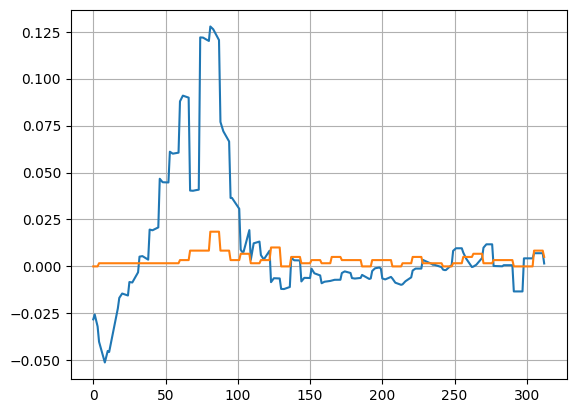

In [ ]:
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print(mse(preds, y_test))
print(np.average(preds)*np.max(covid_mongolia["new_deaths_smoothed"]))

0.0011038050316056335
0.8898483834641605


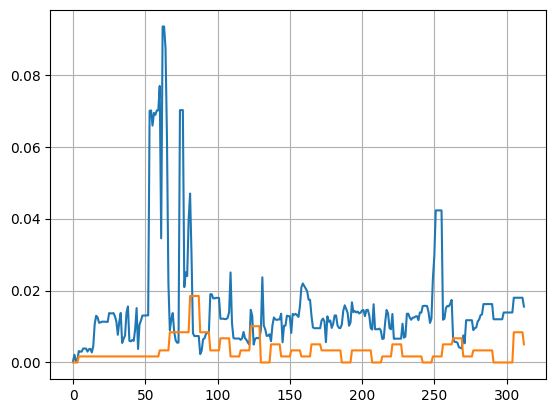

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()


In [ ]:
mse(preds, y_test)

0.0003682638758325674

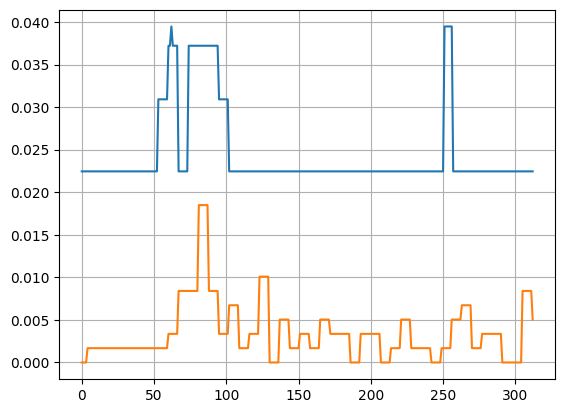

0.0004612454270243631

In [ ]:

model = AdaBoostRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()
mse(preds, y_test)

In [ ]:
models = ["LinearRegression", "ARDRegression", #"GammaRegressor", "LogisticRegression","ridge_regression","StackingRegressor",, "VotingRegressor"
        "PassiveAggressiveRegressor",
        "PoissonRegressor","QuantileRegressor","RANSACRegressor","SGDRegressor",
        "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor",
        "BaggingRegressor", "HistGradientBoostingRegressor"]
def get_model(model_name):
    if model_name == "LinearRegression":
        return LinearRegression()
    elif model_name == "ARDRegression":
        return ARDRegression()
    elif model_name == "GammaRegressor":
        return GammaRegressor()
    elif model_name == "LogisticRegression":
        return LogisticRegression()
    elif model_name == "ridge_regression":
        return ridge_regression()
    elif model_name == "PassiveAggressiveRegressor":
        return PassiveAggressiveRegressor()
    elif model_name == "PoissonRegressor":
        return PoissonRegressor()
    elif model_name == "QuantileRegressor":
        return QuantileRegressor()
    elif model_name == "RANSACRegressor":
        return RANSACRegressor()
    elif model_name == "SGDRegressor":
        return SGDRegressor()
    elif model_name == "RandomForestRegressor":
        return RandomForestRegressor()
    elif model_name == "AdaBoostRegressor":
        return AdaBoostRegressor()
    elif model_name == "GradientBoostingRegressor":
        return GradientBoostingRegressor()
    elif model_name == "BaggingRegressor":
        return BaggingRegressor()
    elif model_name == "HistGradientBoostingRegressor":
        return HistGradientBoostingRegressor()
    elif model_name == "StackingRegressor":
        return StackingRegressor()
    else:
        return VotingRegressor()


def train_models():
    for model_name in models:
        print(model_name)
        model = get_model(model_name)
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        plt.plot(covid_mongolia["date"][-len(y_test):],preds)
        plt.plot(covid_mongolia["date"][-len(y_test):],y_test)
        plt.title(model_name + ": {:.4f} average: {:.2f}".format(mse(preds, y_test), mse(preds, y_test)*np.max(covid_mongolia["new_deaths_smoothed"])))
        plt.grid()
        plt.show()


LinearRegression


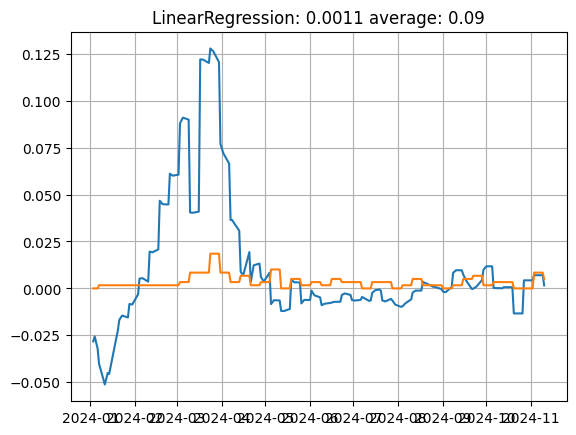

ARDRegression


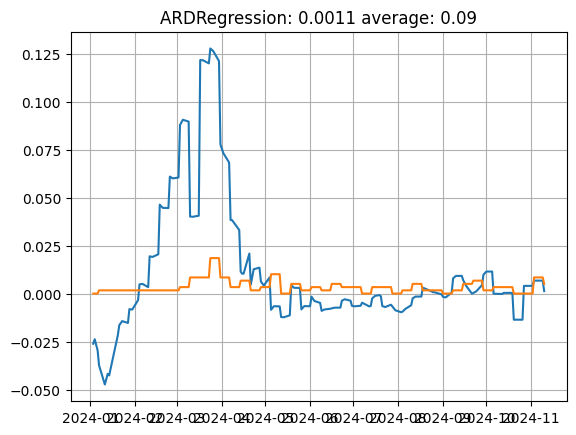

PassiveAggressiveRegressor


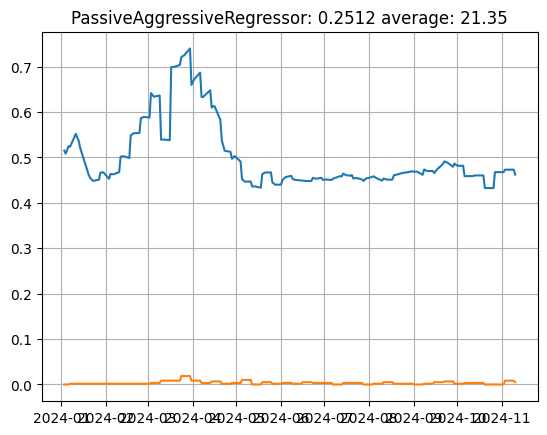

PoissonRegressor


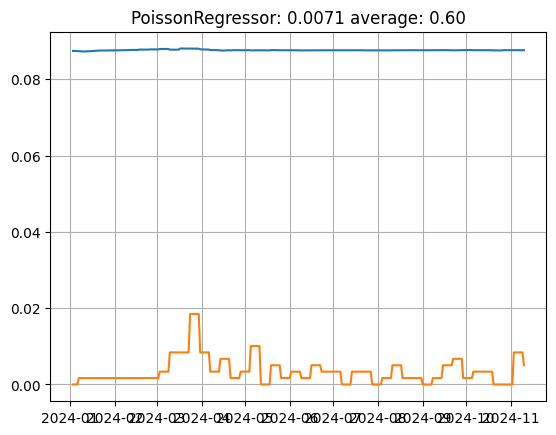

QuantileRegressor


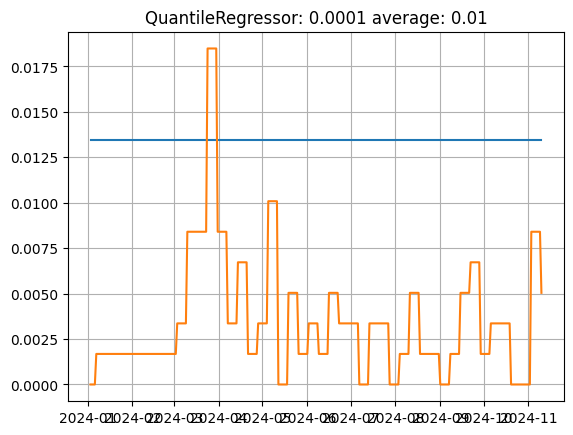

RANSACRegressor


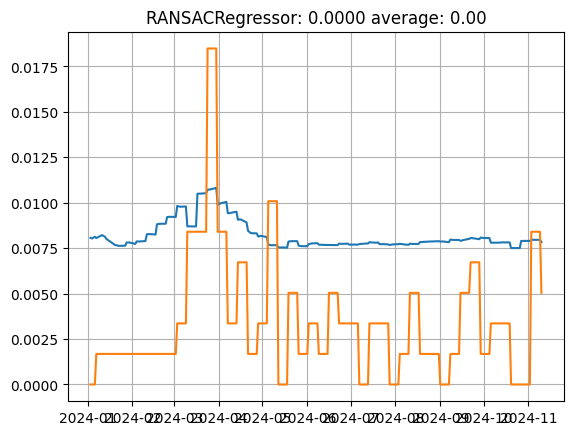

SGDRegressor


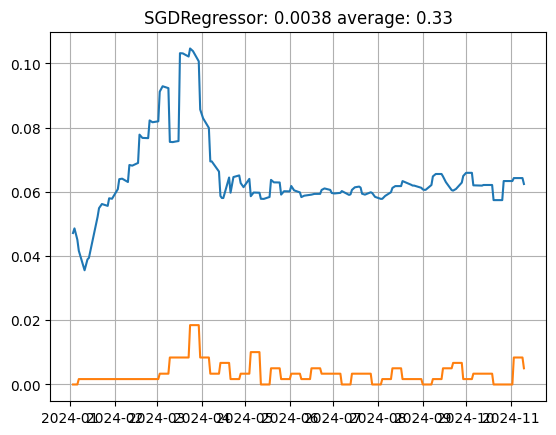

RandomForestRegressor


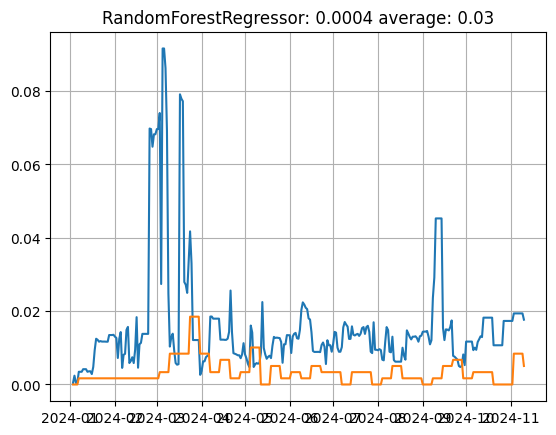

AdaBoostRegressor


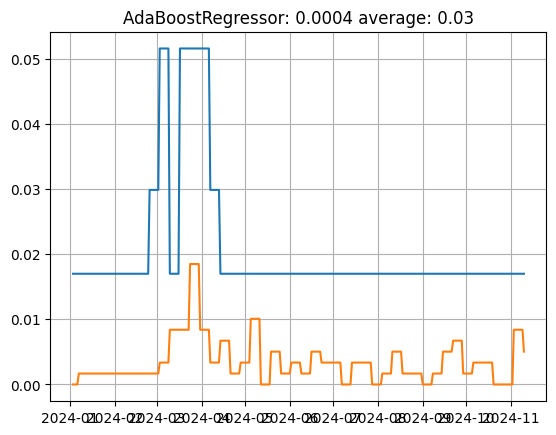

GradientBoostingRegressor


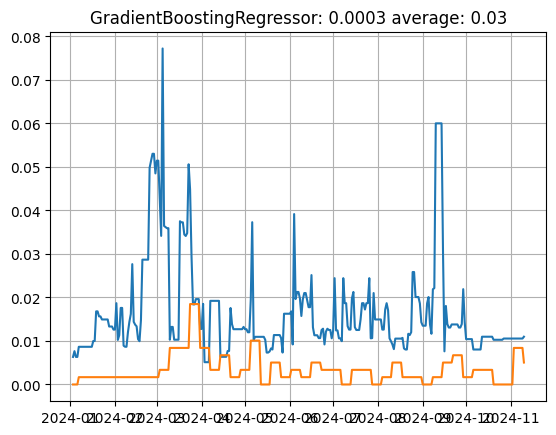

BaggingRegressor


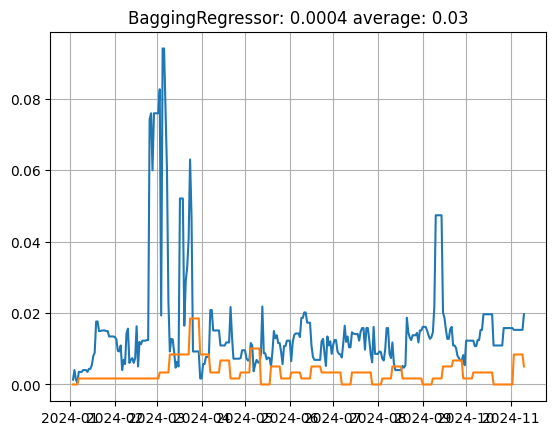

HistGradientBoostingRegressor


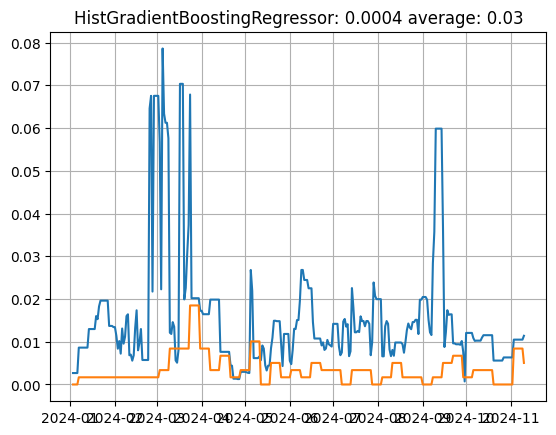

In [ ]:
train_models()

# Лаборатори 6: Даалгавар
1. Тодорхой улсыг сонгон авч сургалтын мэдээллийг боловсруулах
2. Оролтын өгөгдлийн feature - ийг сонгож сургалт явуулах
3. Сургасан загваруудад дүгнэлт хийх

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor, LogisticRegression, PassiveAggressiveRegressor, PoissonRegressor, QuantileRegressor, RANSACRegressor, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt

In [ ]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
covid = pd.read_csv(url)

covid_japan = covid[covid['country'] == "Japan"].copy()
covid_japan["date"] = pd.to_datetime(covid_japan["date"])
covid_japan = covid_japan.dropna(subset=["new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"])

dates = pd.to_datetime(covid_japan["date"])
train_data = covid_japan[["date","new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]].copy()

In [ ]:
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

In [ ]:
train_data["new_people_vaccinated_smoothed"] = train_data["new_people_vaccinated_smoothed"] / np.max(train_data["new_people_vaccinated_smoothed"])
train_data["new_cases_smoothed"] = train_data["new_cases_smoothed"] / np.max(train_data["new_cases_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])

In [ ]:
train_data = train_data.dropna()

X = train_data[["new_people_vaccinated_smoothed", "new_cases_smoothed"]].to_numpy()
y = train_data["new_deaths_smoothed"].to_numpy()

split_idx = int(len(X)*0.7)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

print("Shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Sample training input/output:", X_train[:1], y_train[:1])
print("Sample test input/output:", X_test[:1], y_test[:1])

Shapes: (732, 2) (732,) (315, 2) (315,)
Sample training input/output: [[0.0004771  0.00640559]] [0.04597905]
Sample test input/output: [[0.00125333 0.08877347]] [0.08423575]


In [ ]:
def get_model(model_name):
    # Some models like StackingRegressor or VotingRegressor need extra parameters (estimators) to work properly.
    # For now, we won't include them in the loop unless we define those parameters.
    if model_name == "LinearRegression":
        return LinearRegression()
    elif model_name == "ARDRegression":
        return ARDRegression()
    elif model_name == "GammaRegressor":
        return GammaRegressor()
    elif model_name == "HuberRegressor":
        return HuberRegressor()
    elif model_name == "LogisticRegression":
        # Not really suitable for regression target, but included as per user code
        return LogisticRegression()
    elif model_name == "PassiveAggressiveRegressor":
        return PassiveAggressiveRegressor()
    elif model_name == "PoissonRegressor":
        return PoissonRegressor()
    elif model_name == "QuantileRegressor":
        # Default quantile is 0.5 (median regression)
        return QuantileRegressor()
    elif model_name == "RANSACRegressor":
        return RANSACRegressor()
    elif model_name == "SGDRegressor":
        return SGDRegressor()
    elif model_name == "RandomForestRegressor":
        return RandomForestRegressor()
    elif model_name == "AdaBoostRegressor":
        return AdaBoostRegressor()
    elif model_name == "GradientBoostingRegressor":
        return GradientBoostingRegressor()
    elif model_name == "BaggingRegressor":
        return BaggingRegressor()
    elif model_name == "HistGradientBoostingRegressor":
        return HistGradientBoostingRegressor()
    # If we were to include StackingRegressor or VotingRegressor, we'd need a list of base estimators:
    # elif model_name == "StackingRegressor":
    #     return StackingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])
    # elif model_name == "VotingRegressor":
    #     return VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])
    else:
        return None

In [ ]:
models = [
    "LinearRegression", "ARDRegression", "GammaRegressor", "HuberRegressor",
    "LogisticRegression", "PassiveAggressiveRegressor", "PoissonRegressor",
    "QuantileRegressor", "RANSACRegressor", "SGDRegressor",
    "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor",
    "BaggingRegressor", "HistGradientBoostingRegressor"
]

In [ ]:
results = {}
for m in models:
    model = get_model(m)
    if model is None:
        continue
    # Some models like LogisticRegression are not suitable for a continuous target, may produce warnings
    # We'll still attempt to fit as per user code
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = mse(y_test, preds)
        results[m] = error
        print(f"Model: {m}, MSE: {error}")
    except Exception as e:
        print(f"Model: {m} failed with error: {e}")

Model: LinearRegression, MSE: 0.0008303658533279846
Model: ARDRegression, MSE: 0.0006770178003911573
Model: GammaRegressor failed with error: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
Model: HuberRegressor, MSE: 0.0001833550214691021
Model: LogisticRegression failed with error: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
Model: PassiveAggressiveRegressor, MSE: 0.02514559612137303
Model: PoissonRegressor, MSE: 0.00249413454758563
Model: QuantileRegressor, MSE: 0.000725474727029049
Model: RANSACRegressor, MSE: 0.00018111790805559264
Model: SGDRegressor, MSE: 0.0017715533112636981
Model: RandomForestRegressor, MSE: 0.0007428777571097739
Model: AdaBoostRegressor, MSE: 0.008967815100773957
Model: GradientBoostingRegressor, MSE: 0.0003979153082977946
Model: BaggingRegressor, MSE: 0.0004589015440175529
Model: HistGradientBoostingRegressor, MSE: 0.0025548

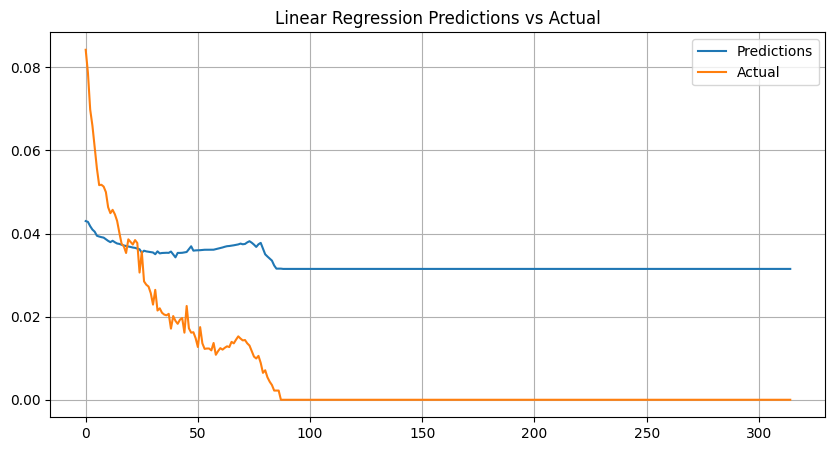

In [ ]:
chosen_model = LinearRegression()
chosen_model.fit(X_train, y_train)
chosen_preds = chosen_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(chosen_preds, label='Predictions')
plt.plot(y_test, label='Actual')
plt.title("Linear Regression Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# To convert predictions back to original scale:
# The original max of new_deaths_smoothed:
original_max = np.max(covid_japan["new_deaths_smoothed"])
# Remember we normalized this column by dividing by its maximum
# After predictions, we can scale back:
chosen_preds_original_scale = chosen_preds * original_max
print("Sample predictions on original scale:", chosen_preds_original_scale[:10])


Sample predictions on original scale: [69.21985264 68.90458895 67.24463542 65.92095942 65.11358005 63.53157353
 63.2336571  62.99221894 62.8070745  62.16739325]


aaa

In [ ]:
covid_japan=covid[covid['country']=="Japan"]
covid_japan

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
199566,Japan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199567,Japan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199568,Japan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199569,Japan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199570,Japan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201346,Japan,2024-11-15,33803572.0,0.0,0.0,270433.8,0.0,0.0,74694.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
201347,Japan,2024-11-16,33803572.0,0.0,0.0,270433.8,0.0,0.0,74694.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
201348,Japan,2024-11-17,33803572.0,0.0,0.0,270433.8,0.0,0.0,74694.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
201349,Japan,2024-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92


In [ ]:
covid_japan.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
199566,Japan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199567,Japan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199568,Japan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199569,Japan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92
199570,Japan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,124997586.0,342.9289,48.548,NaN,41837.91,0.727888,6.6,NaN,12.98,0.92


In [ ]:
covid_japan.shape

(1785, 61)

In [ ]:
covid_japan["date"]=pd.to_datetime(covid_japan["date"])

<ipython-input-63-b2e84a38e971>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_japan["date"]=pd.to_datetime(covid_japan["date"])


In [ ]:
dates = pd.to_datetime(covid_japan["date"])

train_data = covid_japan[["date","new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]]
# new_people_vaccinated_smoothed, new_cases_smoothed, new_deaths_smoothed
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

<ipython-input-64-a41535d5f6e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Year"] = dates.dt.year
<ipython-input-64-a41535d5f6e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Month"] = dates.dt.month
<ipython-input-64-a41535d5f6e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
199566,2020-01-01,NaN,NaN,NaN,2020,1,1
199567,2020-01-02,NaN,NaN,NaN,2020,1,2
199568,2020-01-03,NaN,NaN,NaN,2020,1,3
199569,2020-01-04,NaN,NaN,NaN,2020,1,4
199570,2020-01-05,NaN,NaN,NaN,2020,1,5


In [ ]:
train_data.shape

(1785, 7)

In [ ]:
train_data = train_data.dropna()

In [ ]:
train_data.shape

(1047, 7)

In [ ]:
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
199980,2021-02-18,486.0000,1459.4286,74.00000,2021,2,18
199981,2021-02-19,2457.0000,1451.0000,71.42857,2021,2,19
199982,2021-02-20,2404.1110,1433.5714,69.14286,2021,2,20
199983,2021-02-21,2377.6667,1402.1428,72.14286,2021,2,21
199984,2021-02-22,2361.8000,1241.5714,74.57143,2021,2,22


In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder
import numpy as np

le = LabelEncoder()
normalizer = Normalizer()
onehot = OneHotEncoder()
# train_data["Year"] = le.fit_transform(train_data["Year"])
# train_data["Month"] = onehot.fit_transform(train_data["Month"])
# train_data["Day"] = onehot.fit_transform(train_data["Day"])

train_data["new_people_vaccinated_smoothed"] = train_data["new_people_vaccinated_smoothed"]/ np.max(train_data["new_people_vaccinated_smoothed"])
train_data["new_cases_smoothed"] = train_data["new_cases_smoothed"] / np.max(train_data["new_cases_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,Year,Month,Day
199980,2021-02-18,0.000477,0.006406,0.045979,2021,2,18
199981,2021-02-19,0.002412,0.006369,0.044381,2021,2,19
199982,2021-02-20,0.002360,0.006292,0.042961,2021,2,20
199983,2021-02-21,0.002334,0.006154,0.044825,2021,2,21
199984,2021-02-22,0.002319,0.005449,0.046334,2021,2,22


In [ ]:
X, y = train_data[["new_people_vaccinated_smoothed","new_cases_smoothed"]].to_numpy(), train_data["new_deaths_smoothed"].to_numpy()
X_train, y_train = X[:int(len(X)*0.7)], y[:int(len(y)*0.7)]
X_test, y_test = X[int(len(X)*0.7):], y[int(len(y)*0.7):]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:1], y_train[:1], X_test[:1], y_test[:1])

(732, 2) (732,) (315, 2) (315,)
[[0.0004771  0.00640559]] [0.04597905] [[0.00125333 0.08877347]] [0.08423575]


In [ ]:
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor, LogisticRegression, ridge_regression, PassiveAggressiveRegressor, PoissonRegressor,QuantileRegressor,RANSACRegressor,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
import sklearn

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)

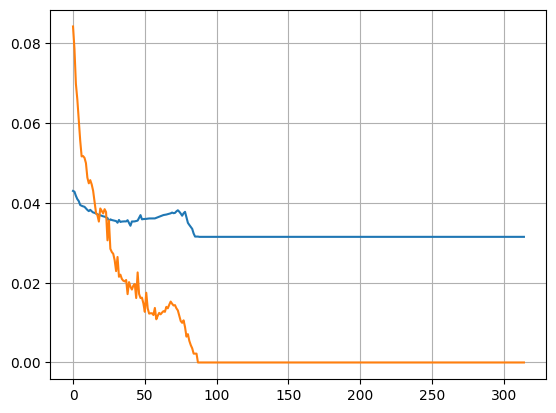

In [ ]:
from matplotlib import pyplot as plt

plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()


0.0008303658533279846
52.987654542961636


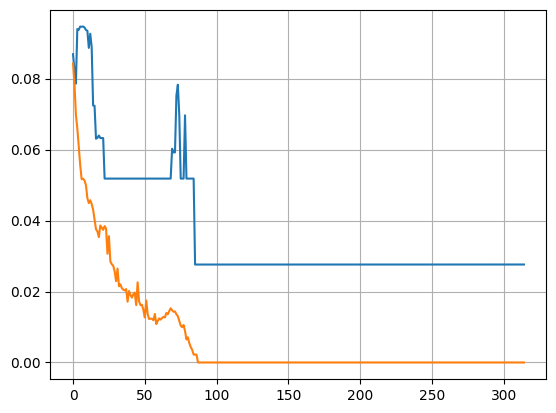

In [ ]:
from sklearn.metrics import mean_squared_error as mse

print(mse(preds, y_test))
print(np.average(preds)*np.max(covid_japan["new_deaths_smoothed"]))

model = RandomForestRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()

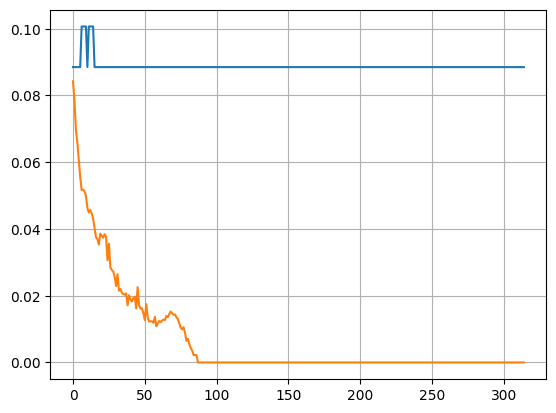

0.006905642003827548

In [ ]:
mse(preds, y_test)


model = AdaBoostRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()
mse(preds, y_test)

In [ ]:
models = ["LinearRegression", "ARDRegression", #"GammaRegressor", "LogisticRegression","ridge_regression","StackingRegressor",, "VotingRegressor"
        "PassiveAggressiveRegressor",
        "PoissonRegressor","QuantileRegressor","RANSACRegressor","SGDRegressor",
        "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor",
        "BaggingRegressor", "HistGradientBoostingRegressor"]
def get_model(model_name):
    if model_name == "LinearRegression":
        return LinearRegression()
    elif model_name == "ARDRegression":
        return ARDRegression()
    elif model_name == "GammaRegressor":
        return GammaRegressor()
    elif model_name == "LogisticRegression":
        return LogisticRegression()
    elif model_name == "ridge_regression":
        return ridge_regression()
    elif model_name == "PassiveAggressiveRegressor":
        return PassiveAggressiveRegressor()
    elif model_name == "PoissonRegressor":
        return PoissonRegressor()
    elif model_name == "QuantileRegressor":
        return QuantileRegressor()
    elif model_name == "RANSACRegressor":
        return RANSACRegressor()
    elif model_name == "SGDRegressor":
        return SGDRegressor()
    elif model_name == "RandomForestRegressor":
        return RandomForestRegressor()
    elif model_name == "AdaBoostRegressor":
        return AdaBoostRegressor()
    elif model_name == "GradientBoostingRegressor":
        return GradientBoostingRegressor()
    elif model_name == "BaggingRegressor":
        return BaggingRegressor()
    elif model_name == "HistGradientBoostingRegressor":
        return HistGradientBoostingRegressor()
    elif model_name == "StackingRegressor":
        return StackingRegressor()
    else:
        return VotingRegressor()

# Лаборатори 7

In [ ]:
plt.plot(X[:,0])
plt.plot(X[:,1])
plt.plot(y)
plt.grid()
plt.show()

In [ ]:
X_train, y_train = X[:int(len(X)*0.7)], y[:int(len(y)*0.7)]
X_test, y_test = X[int(len(X)*0.7):], y[int(len(y)*0.7):]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
class covid_dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, seq_len=10):
        self.X = X
        self.y = y
        self.seq_len = seq_len

    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)

    def __getitem__(self, index):
        return (self.X[index:index+self.seq_len], self.y[index+self.seq_len-1])

In [ ]:
import torch.nn as nn
class Timeseries_model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Timeseries_model, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True).double()
        self.linear = nn.Linear(hidden_size, output_size).double()

    def forward(self, x, hidden=None):
        if hidden==None:
            self.hidden = (torch.zeros(1,x.shape[0],self.hidden_size).double(),
                           torch.zeros(1,x.shape[0],self.hidden_size).double())
        else:
            self.hidden = hidden
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        b,s,f = lstm_out.shape
        predictions = self.linear(lstm_out.reshape(b*s, -1))
        predictions = predictions.reshape(b,s, -1)
        return predictions[:,-1,:].reshape(-1), self.hidden

In [ ]:
model = Timeseries_model(2,20,1)
model.double()
train_dataset = covid_dataset(X_train, y_train, seq_len=7)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle = False)
for i, (x,y) in enumerate(train_loader):
    print(i, x.shape, y.shape)
    out, _ = model(x.double())
    print(out.shape)
    break

# Лаборатори 7: Даалгавар
1. LSTM сургалт болон тестийг хэрэгжүүлэх
2. LSTM Layer тоо, hidden_num, гэх мэт туслах параметрүүдийг өөрчлөн сургалтын алдааг багасгах
3. Оролтын өгөгдлийн feature - ийг дахин сонгож сургалт явуулах
4. Сургалт зөв болсон эсэхийг тестийн санд сургасан загвараар таамаглал гарган график байгуулан шалгах
5. Тестийн алдаа болон сургалтын алдаанд дүгнэлт хийх.

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

torch.manual_seed(42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

X_train_tensor = X_train_tensor.view(-1, 1, X_train_tensor.shape[1])
X_test_tensor = X_test_tensor.view(-1, 1, X_test_tensor.shape[1])


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
input_size = X_train_tensor.shape[2]
hidden_size = 64
num_layers = 2


In [ ]:
model = LSTMModel(input_size, hidden_size, num_layers)


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

In [ ]:
num_epochs = 1000

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([732])) that is different to the input size (torch.Size([732, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Loss: 0.0106
Epoch [20/1000], Loss: 0.0106
Epoch [30/1000], Loss: 0.0106
Epoch [40/1000], Loss: 0.0106
Epoch [50/1000], Loss: 0.0106
Epoch [60/1000], Loss: 0.0106
Epoch [70/1000], Loss: 0.0106
Epoch [80/1000], Loss: 0.0106
Epoch [90/1000], Loss: 0.0106
Epoch [100/1000], Loss: 0.0106
Epoch [110/1000], Loss: 0.0106
Epoch [120/1000], Loss: 0.0106
Epoch [130/1000], Loss: 0.0106
Epoch [140/1000], Loss: 0.0106
Epoch [150/1000], Loss: 0.0106
Epoch [160/1000], Loss: 0.0106
Epoch [170/1000], Loss: 0.0106
Epoch [180/1000], Loss: 0.0106
Epoch [190/1000], Loss: 0.0106
Epoch [200/1000], Loss: 0.0105
Epoch [210/1000], Loss: 0.0105
Epoch [220/1000], Loss: 0.0105
Epoch [230/1000], Loss: 0.0105
Epoch [240/1000], Loss: 0.0105
Epoch [250/1000], Loss: 0.0105
Epoch [260/1000], Loss: 0.0105
Epoch [270/1000], Loss: 0.0105
Epoch [280/1000], Loss: 0.0105
Epoch [290/1000], Loss: 0.0105
Epoch [300/1000], Loss: 0.0105
Epoch [310/1000], Loss: 0.0105
Epoch [320/1000], Loss: 0.0105
Epoch [330/1000],

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = scaler_y.inverse_transform(test_outputs.numpy().reshape(-1, 1)).flatten()


Mean Squared Error on Test Set: 0.004627643993577353


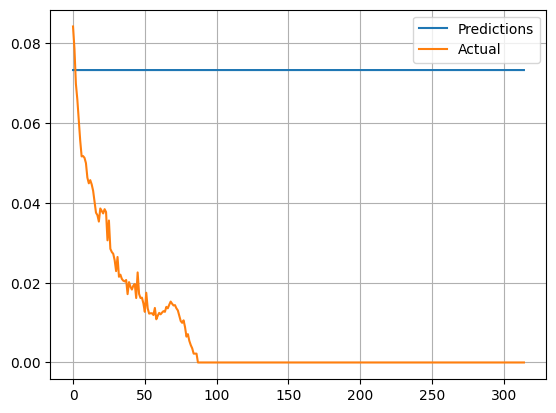

In [ ]:
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, test_preds)
print(f'Mean Squared Error on Test Set: {mse}')

plt.plot(test_preds, label='Predictions')
plt.plot(y_test_original, label='Actual')
plt.legend()
plt.grid()
plt.show()


# Лаборатори 8: Даалгавар
1. Transformer сургалт болон тестийг хэрэгжүүлэх
2. Transformer Layer тоо, hidden_num, гэх мэт туслах параметрүүдийг өөрчлөн сургалтын алдааг багасгах
3. Оролтын өгөгдлийн feature - ийг дахин сонгож сургалт явуулах
4. Сургалт зөв болсон эсэхийг тестийн санд сургасан загвараар таамаглал гарган график байгуулан шалгах
5. Тестийн алдаа болон сургалтын алдаанд дүгнэлт хийх.

In [ ]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.nn as nn


In [ ]:
covid = pd.read_csv("owid-covid-data.csv")

covid_mongolia = covid[covid['location'] == "Japan"]

covid_mongolia["date"] = pd.to_datetime(covid_mongolia["date"])

train_data = covid_mongolia[["date", "new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]]

train_data["Year"] = train_data["date"].dt.year
train_data["Month"] = train_data["date"].dt.month
train_data["Day"] = train_data["date"].dt.day

train_data = train_data.dropna()

train_data["new_people_vaccinated_smoothed"] = train_data["new_people_vaccinated_smoothed"] / np.max(train_data["new_people_vaccinated_smoothed"])
train_data["new_cases_smoothed"] = train_data["new_cases_smoothed"] / np.max(train_data["new_cases_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])

X = train_data[["new_people_vaccinated_smoothed", "new_cases_smoothed"]].to_numpy()
y = train_data["new_deaths_smoothed"].to_numpy()

print(f"Number of rows in train_data: {train_data.shape[0]}")
print(train_data.isnull().sum())
print(covid_mongolia[["new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]].head())
train_data = train_data.dropna(how='all')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)


Number of rows in train_data: 809
date                              0
new_people_vaccinated_smoothed    0
new_cases_smoothed                0
new_deaths_smoothed               0
Year                              0
Month                             0
Day                               0
dtype: int64
        new_people_vaccinated_smoothed  new_cases_smoothed  \
188626                             NaN                 NaN   
188627                             NaN                 NaN   
188628                             NaN                 NaN   
188629                             NaN                 NaN   
188630                             NaN                 NaN   

        new_deaths_smoothed  
188626                  NaN  
188627                  NaN  
188628                  NaN  
188629                  NaN  
188630                  NaN  


<ipython-input-51-f3c1fa048662>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mongolia["date"] = pd.to_datetime(covid_mongolia["date"])
<ipython-input-51-f3c1fa048662>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Year"] = train_data["date"].dt.year
<ipython-input-51-f3c1fa048662>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
scaler_y = MinMaxScaler()
y_train_tensor = torch.tensor(scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten(), dtype=torch.float32)

hidden_size = 64
num_heads = 4

while hidden_size % num_heads != 0:
    hidden_size += 1

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, num_layers):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_size,
                nhead=num_heads,
                dim_feedforward=hidden_size,
            ),
            num_layers=num_layers,
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.embedding(x)
        out = self.transformer(out)
        out = self.fc(out[-1, :, :])
        return out


In [ ]:
input_size = 2
num_layers = 2


In [ ]:
model = TransformerModel(input_size, hidden_size, num_heads, num_layers)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([566])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Loss: 0.1721
Epoch [2/100], Loss: 10.8626
Epoch [3/100], Loss: 1.6406
Epoch [4/100], Loss: 0.9927
Epoch [5/100], Loss: 0.9502
Epoch [6/100], Loss: 0.1014
Epoch [7/100], Loss: 0.0592
Epoch [8/100], Loss: 0.0103
Epoch [9/100], Loss: 0.2448
Epoch [10/100], Loss: 0.1038
Epoch [11/100], Loss: 0.0123
Epoch [12/100], Loss: 0.0183
Epoch [13/100], Loss: 0.0107
Epoch [14/100], Loss: 0.0355
Epoch [15/100], Loss: 0.1872
Epoch [16/100], Loss: 0.0621
Epoch [17/100], Loss: 0.0278
Epoch [18/100], Loss: 0.0358
Epoch [19/100], Loss: 0.0334
Epoch [20/100], Loss: 0.0196
Epoch [21/100], Loss: 0.0755
Epoch [22/100], Loss: 0.0168
Epoch [23/100], Loss: 0.0965
Epoch [24/100], Loss: 0.1381
Epoch [25/100], Loss: 0.0222
Epoch [26/100], Loss: 0.0105
Epoch [27/100], Loss: 0.0121
Epoch [28/100], Loss: 0.0121
Epoch [29/100], Loss: 0.0194
Epoch [30/100], Loss: 0.0235
Epoch [31/100], Loss: 0.0424
Epoch [32/100], Loss: 0.0280
Epoch [33/100], Loss: 0.0324
Epoch [34/100], Loss: 0.0317
Epoch [35/100], Loss: 

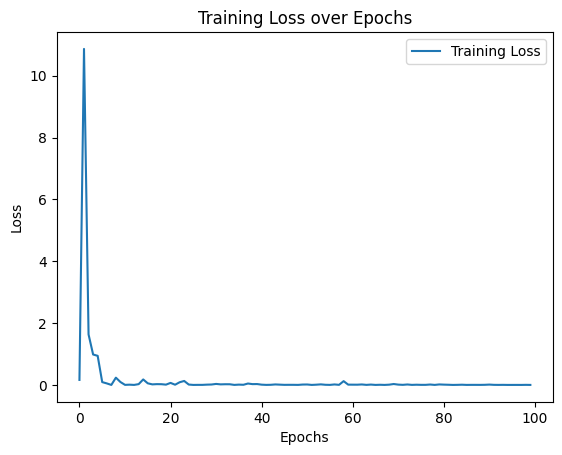

In [ ]:
train_losses = []

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    loss = criterion(outputs.flatten(), y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the loss value for plotting

    # if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting the training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = scaler_y.inverse_transform(test_outputs.numpy().reshape(-1, 1)).flatten()

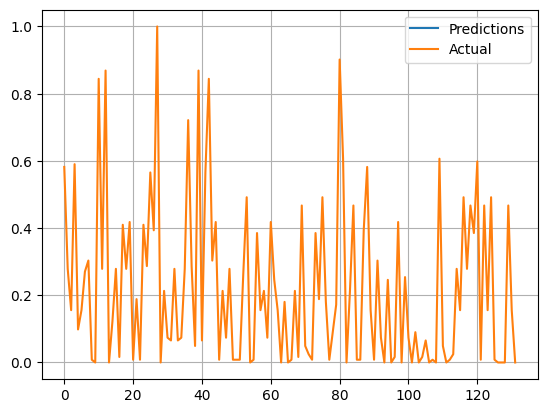

In [ ]:
plt.plot(test_preds, label='Predictions')
plt.plot(y_test_original, label='Actual')
plt.legend()
plt.grid()
plt.show()


### BESt

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
covid = pd.read_csv("owid-covid-data.csv")
covid_mongolia = covid[covid['location'] == "Mongolia"].copy()

covid_mongolia["date"] = pd.to_datetime(covid_mongolia["date"])
train_data = covid_mongolia[["date", "new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed"]]

train_data = train_data.dropna()

train_data["Year"] = train_data["date"].dt.year
train_data["Month"] = train_data["date"].dt.month
train_data["Day"] = train_data["date"].dt.day

# For this example, we only use vaccination and cases as inputs and deaths as target
X_raw = train_data[["new_people_vaccinated_smoothed", "new_cases_smoothed"]].values
y_raw = train_data["new_deaths_smoothed"].values

<ipython-input-68-e7ed7bd58cc5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Year"] = train_data["date"].dt.year
<ipython-input-68-e7ed7bd58cc5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Month"] = train_data["date"].dt.month
<ipython-input-68-e7ed7bd58cc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_raw.reshape(-1, 2))
y_scaled = scaler_y.fit_transform(y_raw.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(0)  # shape (1, N, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # shape (N,)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(0)    # shape (1, M, 2)

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)

In [ ]:

hidden_size = 64
num_heads = 4
num_layers = 2
input_size = 2

while hidden_size % num_heads != 0:
    hidden_size += 1

In [ ]:

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(1)  # shape (max_len, 1, d_model)

    def forward(self, x):
        # x is (seq_len, batch_size, d_model)
        seq_len = x.size(0)
        return x + self.pe[:seq_len, :].to(x.device)

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, num_layers):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = PositionalEncoding(hidden_size)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, dim_feedforward=hidden_size)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: (seq_len, batch_size, input_size)
        out = self.embedding(x)
        out = self.pos_encoder(out)
        out = self.transformer(out)
        # We take the output of the last time step (seq_len=1) which is out[0]
        out = self.fc(out[0])  # shape: (batch_size, 1)
        return out.squeeze()

In [ ]:
model = TransformerModel(input_size, hidden_size, num_heads, num_layers).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)  # shape: (N,)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.0800
Epoch [2/100], Loss: 0.0814
Epoch [3/100], Loss: 0.0815
Epoch [4/100], Loss: 0.0793
Epoch [5/100], Loss: 0.0803
Epoch [6/100], Loss: 0.0798
Epoch [7/100], Loss: 0.0798
Epoch [8/100], Loss: 0.0784
Epoch [9/100], Loss: 0.0780
Epoch [10/100], Loss: 0.0798
Epoch [11/100], Loss: 0.0785
Epoch [12/100], Loss: 0.0802
Epoch [13/100], Loss: 0.0811
Epoch [14/100], Loss: 0.0761
Epoch [15/100], Loss: 0.0781
Epoch [16/100], Loss: 0.0780
Epoch [17/100], Loss: 0.0801
Epoch [18/100], Loss: 0.0806
Epoch [19/100], Loss: 0.0792
Epoch [20/100], Loss: 0.0797
Epoch [21/100], Loss: 0.0808
Epoch [22/100], Loss: 0.0766
Epoch [23/100], Loss: 0.0802
Epoch [24/100], Loss: 0.0815
Epoch [25/100], Loss: 0.0786
Epoch [26/100], Loss: 0.0783
Epoch [27/100], Loss: 0.0810
Epoch [28/100], Loss: 0.0786
Epoch [29/100], Loss: 0.0786
Epoch [30/100], Loss: 0.0799
Epoch [31/100], Loss: 0.0788
Epoch [32/100], Loss: 0.0786
Epoch [33/100], Loss: 0.0799
Epoch [34/100], Loss: 0.0817
Epoch [35/100], Loss: 0

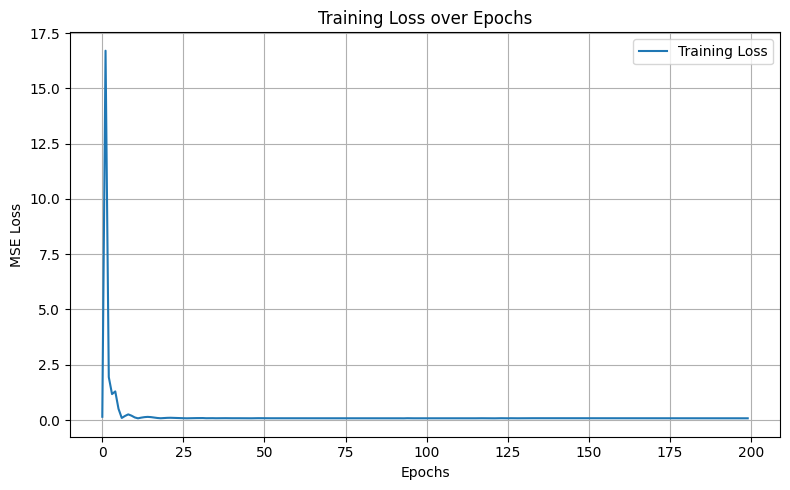

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)  # shape: (M,)
    test_outputs = test_outputs.cpu().numpy().reshape(-1, 1)
    test_preds = scaler_y.inverse_transform(test_outputs).flatten()

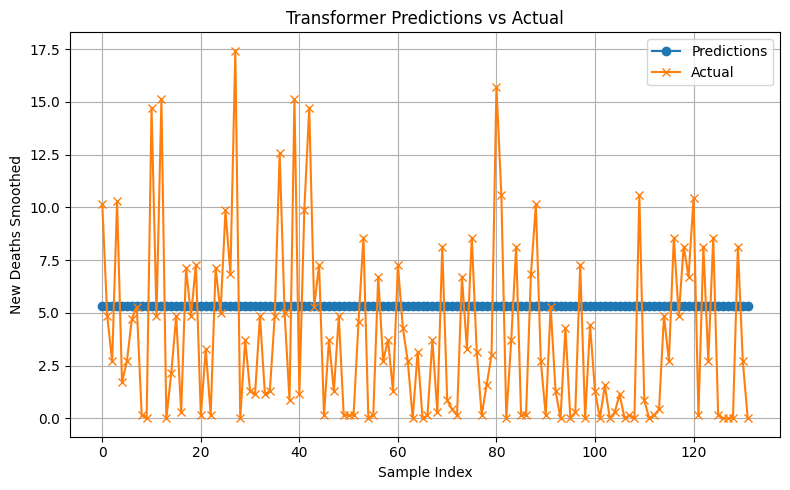

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(test_preds, label='Predictions', marker='o')
plt.plot(y_test_original, label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('New Deaths Smoothed')
plt.title('Transformer Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# After predictions are obtained
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)  # shape: (M,)
    test_outputs = test_outputs.cpu().numpy().reshape(-1, 1)
    test_preds = scaler_y.inverse_transform(test_outputs).flatten()

# Compute the original test target values (y_test_original) from y_test
# Note: If y_test was already scaled (as shown previously), we first confirm its shape.
#       If you did train_test_split on the scaled data (y_scaled), then y_test is already scaled.
#       In that case, you don't need to transform again, just inverse it.
y_test_scaled = y_test.reshape(-1, 1)  # y_test is already in scaled form
y_test_original = scaler_y.inverse_transform(y_test_scaled).flatten()

# Compute MSE on the test set
mse = mean_squared_error(y_test_original, test_preds)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 19.17535979592077


In [ ]:
model.eval()
test_preds = []
with torch.no_grad():
    for i in range(X_test.shape[0]):
        # Take the i-th sample and reshape it as a single-sequence input
        single_sample = X_test[i].reshape(1, 1, 2)  # seq_len=1, batch_size=1, features=2
        single_sample_tensor = torch.tensor(single_sample, dtype=torch.float32)
        output = model(single_sample_tensor)  # shape: (batch_size, 1)
        prediction = scaler_y.inverse_transform(output.numpy().reshape(-1,1)).flatten()
        test_preds.append(prediction[0])

test_preds = np.array(test_preds)
print("Test predictions shape:", test_preds.shape)  # Should be (132,)

mse = mean_squared_error(y_test_original, test_preds)
print(f'Mean Squared Error on Test Set: {mse}')


Test predictions shape: (132,)
Mean Squared Error on Test Set: 19.17535983419322


In [ ]:
print(f"Shape of X_test_tensor: {X_test_tensor.shape}")


Shape of X_test_tensor: torch.Size([1, 132, 2])


Mean Squared Error on Test Set: 26.109268499489755


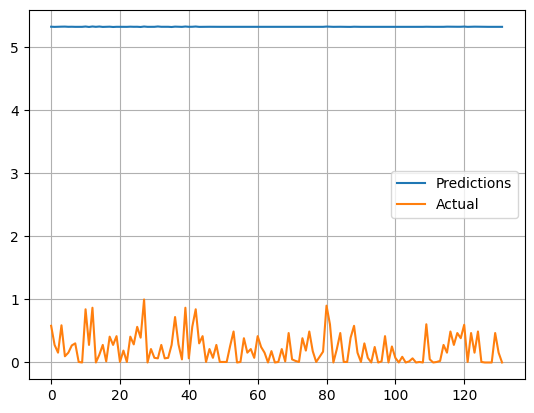

In [ ]:

y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, test_preds)
print(f'Mean Squared Error on Test Set: {mse}')

plt.plot(test_preds, label='Predictions')
plt.plot(y_test_original, label='Actual')
plt.legend()
plt.grid()
plt.show()
